In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
df = pd.read_csv('E:\CODING\PROGRAMS\PROJ EXHIBITION\Amazon_top5_mobilephones.csv', encoding = "ISO-8859-1", engine='python')
df2 = pd.read_csv('E:\CODING\PROGRAMS\PROJ EXHIBITION\SmartphoneCompanySales.csv', encoding = "ISO-8859-1", engine='python')

In [203]:
df.head()

,Description,Price,Rating,ReviewCount,Url
0,Apple iPhone 13 (128GB) - Pink,65999,4.6 out of 5 stars,"7,507",https://www.amazon.in//sspa/click?ie=UTF8&spc=...
1,Apple iPhone 13 Mini (128GB) - Pink,64900,4.5 out of 5 stars,"1,341",https://www.amazon.in//sspa/click?ie=UTF8&spc=...
2,Apple iPhone 12 (128GB) - Green,55999,4.5 out of 5 stars,"4,941",https://www.amazon.in//New-Apple-iPhone-12-128...
3,Apple iPhone 12 (64GB) - Green,48900,4.6 out of 5 stars,"1,299",https://www.amazon.in//New-Apple-iPhone-12-64G...
4,Apple iPhone 13 (128GB) - Green,65999,4.6 out of 5 stars,"7,507",https://www.amazon.in//Apple-iPhone-13-128GB-G...


In [204]:
# # Convert the "Rating" column to strings and then extract the numeric part
# df['Rating'] = df['Rating'].astype(str).str.extract(r'(\d+\.\d+)').astype(float)

# # Convert the "ReviewCount" column to strings, remove the comma, and convert to float
# df['ReviewCount'] = df['ReviewCount'].astype(str).str.replace(',', '').astype(float)
# df['ReviewCount'] = pd.to_numeric(df['ReviewCount'], errors='coerce')

# Convert the "Rating" column to strings and then extract the numeric part
df['Rating'] = df['Rating'].astype(str).str.extract(r'(\d+\.\d+)')
# Replace non-numeric values with a default value (e.g., 0)
df['Rating'] = df['Rating'].fillna('0').astype(float)

# Print the resulting DataFrame
print(df)

                                            Description  Price  Rating  \
0                        Apple iPhone 13 (128GB) - Pink  65999     4.6   
1                   Apple iPhone 13 Mini (128GB) - Pink  64900     4.5   
2                       Apple iPhone 12 (128GB) - Green  55999     4.5   
3                        Apple iPhone 12 (64GB) - Green  48900     4.6   
4                       Apple iPhone 13 (128GB) - Green  65999     4.6   
...                                                 ...    ...     ...   
1898  Vivo Y21 (Midnight Blue, 4GB RAM, 64GB Storage...  12660     4.1   
1899  vivo Y22 (Metaverse Green, 6GB RAM, 128GB Stor...  16499     3.6   
1900  Vivo Y33s (Mirror Black, 8GB RAM, 128GB Storag...  17900     4.2   
1901  vivo Y35 (Agate Black, 8GB RAM, 128GB Storage)...  18499     4.1   
1902  vivo Y16 (Stellar Black, 3GB RAM, 32GB Storage...   9999     4.0   

     ReviewCount                                                Url  
0          7,507  https://www.amazon.in//

In [205]:
df['phone_model'] = df['Description'].str.split().str[:3].str.join(' ')
df

,Description,Price,Rating,ReviewCount,Url,phone_model
0,Apple iPhone 13 (128GB) - Pink,65999,4.6,"7,507",https://www.amazon.in//sspa/click?ie=UTF8&spc=...,Apple iPhone 13
1,Apple iPhone 13 Mini (128GB) - Pink,64900,4.5,"1,341",https://www.amazon.in//sspa/click?ie=UTF8&spc=...,Apple iPhone 13
2,Apple iPhone 12 (128GB) - Green,55999,4.5,"4,941",https://www.amazon.in//New-Apple-iPhone-12-128...,Apple iPhone 12
3,Apple iPhone 12 (64GB) - Green,48900,4.6,"1,299",https://www.amazon.in//New-Apple-iPhone-12-64G...,Apple iPhone 12
4,Apple iPhone 13 (128GB) - Green,65999,4.6,"7,507",https://www.amazon.in//Apple-iPhone-13-128GB-G...,Apple iPhone 13
...,...,...,...,...,...,...
1898,"Vivo Y21 (Midnight Blue, 4GB RAM, 64GB Storage...",12660,4.1,"4,302",https://www.amazon.in//Vivo-Y21-Midnight-Stora...,Vivo Y21 (Midnight
1899,"vivo Y22 (Metaverse Green, 6GB RAM, 128GB Stor...",16499,3.6,28,https://www.amazon.in//Y22-Metaverse-Storage-A...,vivo Y22 (Metaverse
1900,"Vivo Y33s (Mirror Black, 8GB RAM, 128GB Storag...",17900,4.2,923,https://www.amazon.in//Vivo-Y33s-Mirror-Storag...,Vivo Y33s (Mirror
1901,"vivo Y35 (Agate Black, 8GB RAM, 128GB Storage)...",18499,4.1,92,https://www.amazon.in//Agate-Storage-Additiona...,vivo Y35 (Agate


In [206]:
df2.head()

,BRANDS,SALES IN MILLIONS
0,Samsung,259.6
1,NaN,NaN
2,Apple,223.7
3,NaN,NaN
4,Xiaomi,152.2


In [207]:
#dropping NaN values
df2 = df2.dropna().reset_index()
df2.head()

,index,BRANDS,SALES IN MILLIONS
0,0,Samsung,259.6
1,2,Apple,223.7
2,4,Xiaomi,152.2
3,6,Oppo,106.2
4,8,Vivo,100.0


In [208]:
#also grouping phones having same names and only having the columns which will actually be useful
df = df.groupby('phone_model').agg({'Rating' : 'mean', 'Price' : 'mean'}).reset_index()
df['BRANDS'] = df['phone_model'].str.split().str[:1].str.join(' ')
df

,phone_model,Rating,Price,BRANDS
0,(Renewed) Mi 10i,3.000000,21499.000000,(Renewed)
1,(Renewed) Mi Redmi,3.400000,8899.000000,(Renewed)
2,(Renewed) Redmi Note,0.000000,15499.000000,(Renewed)
3,(Renewed) Vivo V17,3.200000,15599.000000,(Renewed)
4,(Renewed) Xiaomi 11,3.300000,19999.000000,(Renewed)
5,Apple iPhone 11,4.600000,40999.000000,Apple
6,Apple iPhone 12,4.533333,52799.333333,Apple
7,Apple iPhone 13,4.580000,74939.600000,Apple
8,Apple iPhone 14,4.560000,87300.000000,Apple
9,BTC-6 Mini Size,0.000000,760.000000,BTC-6


In [209]:
df3 = df.merge(df2, on = 'BRANDS')
df3.head()

,phone_model,Rating,Price,BRANDS,index,SALES IN MILLIONS
0,Apple iPhone 11,4.600000,40999.000000,Apple,2,223.7
1,Apple iPhone 12,4.533333,52799.333333,Apple,2,223.7
2,Apple iPhone 13,4.580000,74939.600000,Apple,2,223.7
3,Apple iPhone 14,4.560000,87300.000000,Apple,2,223.7
4,IKALL Z20 Smartphone,4.300000,7499.000000,IKALL,26,1.0


In [210]:
#Now we have df1 which will be used for product based ranking and we have df2 will be used for company based ranking

In [211]:
"""
now we will sort df1 on the basis of price range and create a seperate dataframe for each price range
price ranges:
0 - 9999
10000 - 19999
20000 - 29999
30000 - 39999
39999 - 40000
40000 - 49999
50000 - 59999
"""

'\nnow we will sort df1 on the basis of price range and create a seperate dataframe for each price range\nprice ranges:\n0 - 9999\n10000 - 19999\n20000 - 29999\n30000 - 39999\n39999 - 40000\n40000 - 49999\n50000 - 59999\n'

In [212]:
df_below10k = df3[(df3['Price'] >= 0) & (df3['Price'] <= 9999)]
df_below20k = df3[(df3['Price'] >= 10000) & (df3['Price'] <= 19999)]
df_below30k = df3[(df3['Price'] >= 20000) & (df3['Price'] <= 29999)]
df_below40k = df3[(df3['Price'] >= 30000) & (df3['Price'] <= 39999)]
df_below50k = df3[(df3['Price'] >= 40000) & (df3['Price'] <= 49999)]
df_below60k = df3[(df3['Price'] >= 50000) & (df3['Price'] <= 59999)]

In [213]:
#ranking each dataframe below the given price range based on company i.e sales in millions

df_below10k = df_below10k.sort_values(by='SALES IN MILLIONS', ascending = False)
df_below20k = df_below20k.sort_values(by='SALES IN MILLIONS', ascending = False)
df_below30k = df_below30k.sort_values(by='SALES IN MILLIONS', ascending = False)
df_below40k = df_below40k.sort_values(by='SALES IN MILLIONS', ascending = False)
df_below50k = df_below50k.sort_values(by='SALES IN MILLIONS', ascending = False)
df_below60k = df_below60k.sort_values(by='SALES IN MILLIONS', ascending = False)

In [214]:
df_below10k = df_below10k.drop_duplicates(subset = 'BRANDS')
df_below20k = df_below20k.drop_duplicates(subset = 'BRANDS')
df_below30k = df_below30k.drop_duplicates(subset = 'BRANDS')
df_below40k = df_below40k.drop_duplicates(subset = 'BRANDS')
df_below50k = df_below50k.drop_duplicates(subset = 'BRANDS')
df_below60k = df_below60k.drop_duplicates(subset = 'BRANDS')

In [220]:
df_below10k.to_csv('company_based_ranking_below10k.csv', index=False)
df_below20k.to_csv('company_based_ranking_below20k.csv', index=False)
df_below30k.to_csv('company_based_ranking_below30k.csv', index=False)
df_below40k.to_csv('company_based_ranking_below40k.csv', index=False)
df_below50k.to_csv('company_based_ranking_below50k.csv', index=False)
df_below60k.to_csv('company_based_ranking_below60k.csv', index=False)

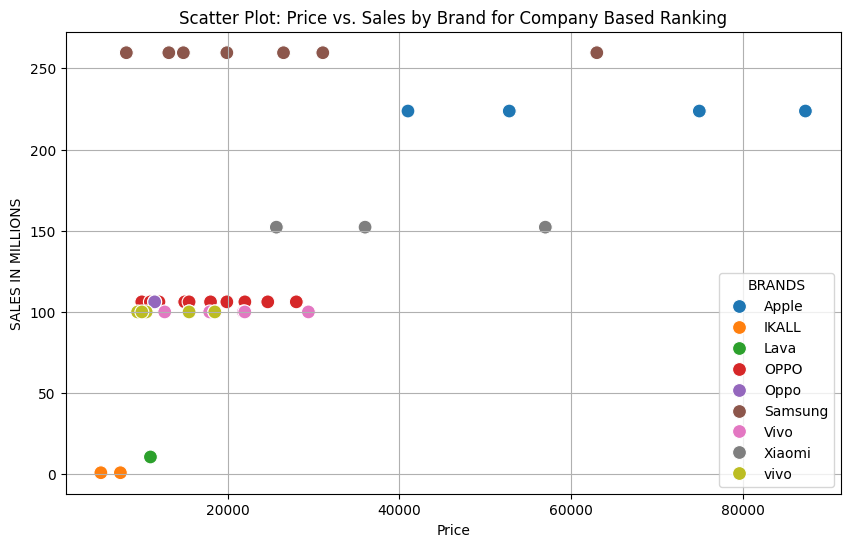

In [218]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='SALES IN MILLIONS', data=df3, hue='BRANDS', s=100)
plt.xlabel('Price')
plt.ylabel('SALES IN MILLIONS')
plt.title('Scatter Plot: Price vs. Sales by Brand for Company Based Ranking')
plt.grid(True)
plt.legend(title='BRANDS')
plt.show()